# Experiment of package use, logic, and data
<hr>

# matplotlib

In [1]:
import matplotlib
matplotlib.use('Agg')

import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# ipython

In [3]:
import IPython
import IPython.display as ipydisp

# numpy

In [4]:
import numpy as np

## util function

In [5]:
def show_array(arr):
    print 'size: %d' % arr.size
    print 'shape: ' + str(arr.shape)
    print 'type: %s' % type(arr)
    print 'data type: %s' % arr.dtype
    print 'item size(number of elements in the array): %s' % arr.itemsize
    print 'ndim: %s' % arr.ndim

In [6]:
def show(msg):
    ipydisp.display(msg)

## data type conversion

### data types

<pre>
| type       | description                                                                      |
|------------+----------------------------------------------------------------------------------|
| bool_      | Boolean (True or False) stored as a byte                                         |
| int_       | Default integer type (same as C long; normally either int64 or int32)            |
| intc       | Identical to C int (normally int32 or int64)                                     |
| intp       | Integer used for indexing (same as C ssize_t; normally either int32 or int64)    |
| int8       | Byte (-128 to 127)                                                               |
| int16      | Integer (-32768 to 32767)                                                        |
| int32      | Integer (-2147483648 to 2147483647)                                              |
| int64      | Integer (-9223372036854775808 to 9223372036854775807)                            |
| uint8      | Unsigned integer (0 to 255)                                                      |
| uint16     | Unsigned integer (0 to 65535)                                                    |
| uint32     | Unsigned integer (0 to 4294967295)                                               |
| uint64     | Unsigned integer (0 to 18446744073709551615)                                     |
| float_     | Shorthand for float64.                                                           |
| float16    | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa                |
| float32    | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa              |
| float64    | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa             |
| complex_   | Shorthand for complex128.                                                        |
| complex64  | Complex number, represented by two 32-bit floats (real and imaginary components) |
| complex128 | Complex number, represented by two 64-bit floats (real and imaginary components) |
</pre>

### creating specific type

In [7]:
arr=np.array([1, 2, 3, 4, 5, 6], dtype=np.uint8)

### converting types

In [8]:
arr.astype(float)

array([ 1.,  2.,  3.,  4.,  5.,  6.])

### to list

In [9]:
arr.tolist()

[1, 2, 3, 4, 5, 6]

### from list

In [10]:
l=[11, 12, 13, 14, 15, 16]
np.array(l)

array([11, 12, 13, 14, 15, 16])

## changing structure

In [11]:
arr2=arr.reshape(3, 2)
print arr2

[[1 2]
 [3 4]
 [5 6]]


In [12]:
# Return a copy of the array collapsed into one dimension.
arr2.flatten()

array([1, 2, 3, 4, 5, 6], dtype=uint8)

In [13]:
# Return a flattened array.
arr2.ravel()

array([1, 2, 3, 4, 5, 6], dtype=uint8)

In [14]:
arr3=arr2.reshape((1, 3, 2))
# Remove single-dimensional entries from the shape of a.
arr3.squeeze(0)

array([[1, 2],
       [3, 4],
       [5, 6]], dtype=uint8)

## ndarray

In [15]:
show_array(arr2)

size: 6
shape: (3, 2)
type: <type 'numpy.ndarray'>
data type: uint8
item size(number of elements in the array): 1
ndim: 2


In [16]:
y=arr2[:,0]
show_array(y)

size: 3
shape: (3,)
type: <type 'numpy.ndarray'>
data type: uint8
item size(number of elements in the array): 1
ndim: 1


### iterating elements

In [17]:
# iterating 2d array
nsum=0
for x in arr2.flat:
    nsum+=x
show(nsum)

21

## operation, statistics

In [18]:
show('transpose')
show(arr2.T)

show('argmax')
show(arr.argmax())

'transpose'

array([[1, 3, 5],
       [2, 4, 6]], dtype=uint8)

'argmax'

5

# skimage

In [19]:
import skimage
import skimage.io

## reading an image

In [20]:
image=skimage.io.imread('data/1413794251.jpg')

### image attributes

In [21]:
print 'size: %d' % image.size
print 'shape: %d, %d' % (image.shape[0], image.shape[1])
print 'type: %s' % type(image)
print 'data type: %s' % image.dtype

size: 1880640
shape: 653, 960
type: <type 'numpy.ndarray'>
data type: uint8


## viewing an image

### using skimage viewer

In [28]:
import skimage.viewer

viewer=skimage.viewer.ImageViewer(image)


### using matplot lib

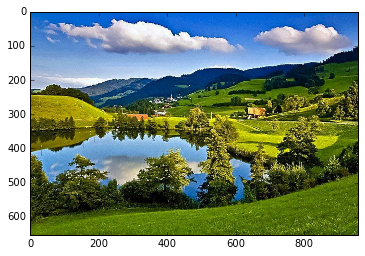

In [32]:
plt.imshow(image)

## viewing an image with plugin

In [27]:
from skimage.viewer.plugins.lineprofile import LineProfile

viewer += LineProfile(viewer)
overlay, data = viewer.show()[0]

Line profile tool
+ and - keys or mouse scroll changes width of scan line.
Select and drag ends of the scan line to adjust it.


## reading multiple images

In [22]:
def imread_convert(f, img_num):
    return skimage.io.imread(f).astype(np.uint8)

filespec='data/*'
collection=skimage.io.ImageCollection(filespec, load_func=imread_convert)

## viewing multiple images

In [23]:
collection_viewer=skimage.viewer.CollectionViewer(collection)
collection_viewer.show()

[]

## drawing

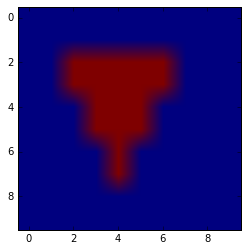

In [35]:
from skimage.draw import polygon

img = np.zeros((10, 10), dtype=np.uint8)
x = np.array([1, 7, 4, 1])
y = np.array([1, 2, 8, 1])
rr, cc = polygon(y, x)
img[rr, cc] = 1
plt.imshow(img)